### Notes on Data being used
- Data is sourced from 3 separate datasets on Kaggle:
    - https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?rvi=1
    - https://www.kaggle.com/datasets/adityakomaravolu/brain-tumor-mri-images?rvi=1
    - https://www.kaggle.com/datasets/abhranta/brain-tumor-detection-mri?rvi=1
- 2 of them are quite similar in format an the other is different in the manner that the images were taken and are at multiple angles.
- the outlier set is appears to have MRIs of the same brain at different angles so may not be an excellent source as it could omit the tumour from the image at ome angles.
- that dataset also gives labels about the diagnosis of each brain image; glioma, meningioma and pituitary.
- one of the 2 similar datasets appears to be older and have lower resolution although that likely won't be an issue

##### examples of MRIs from dataset with diagnosis included
- no tumor
<img src="./Training_withDiagnosis/no/Tr-no_0021.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/no/Tr-no_0045.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/no/Tr-no_0025.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
- glioma
<img src="./Training_withDiagnosis/glioma/Tr-gl_0021.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/glioma/Tr-gl_0045.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/glioma/Tr-gl_0025.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
-  meningioma
<img src="./Training_withDiagnosis/meningioma/Tr-me_0021.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/meningioma/Tr-me_0045.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/meningioma/Tr-me_0025.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
- pituitary
<img src="./Training_withDiagnosis/pituitary/Tr-pi_0021.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/pituitary/Tr-pi_0045.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Training_withDiagnosis/pituitary/Tr-pi_0025.jpg" alt="alt text" width="30%" height="auto" class="blog-image">

##### examples from dataset with lower resolution
- no tumor
<img src="./Brain_images_LowResolution/no/no7.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Brain_images_LowResolution/no/no96.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Brain_images_LowResolution/no/no91.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
- has tumor
<img src="./Brain_images_LowResolution/yes/y11.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Brain_images_LowResolution/yes/y130.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./Brain_images_LowResolution/yes/y124.jpg" alt="alt text" width="30%" height="auto" class="blog-image">



##### examples from original dataset
- no tumor
<img src="./brain_images/no/5 no.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./brain_images/no/8 no.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./brain_images/no/25 no.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
- has tumor
<img src="./brain_images/yes/Y2.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./brain_images/yes/Y6.jpg" alt="alt text" width="30%" height="auto" class="blog-image">
<img src="./brain_images/yes/Y8.jpg" alt="alt text" width="30%" height="auto" class="blog-image">

In [159]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from time import time
from tensorflow.keras.models import Sequential

#### original tester model with initial dataset

In [2]:
batch_size = 32
image_height = 128
image_width = 128

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
    './brain_images/brain_tumor_dataset',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 253 files belonging to 2 classes.
Using 178 files for training.


In [4]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
validate = tf.keras.utils.image_dataset_from_directory(
    './brain_images/brain_tumor_dataset',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 75 files for validation.


In [6]:
validate

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
class_names = train.class_names
class_names

['no', 'yes']

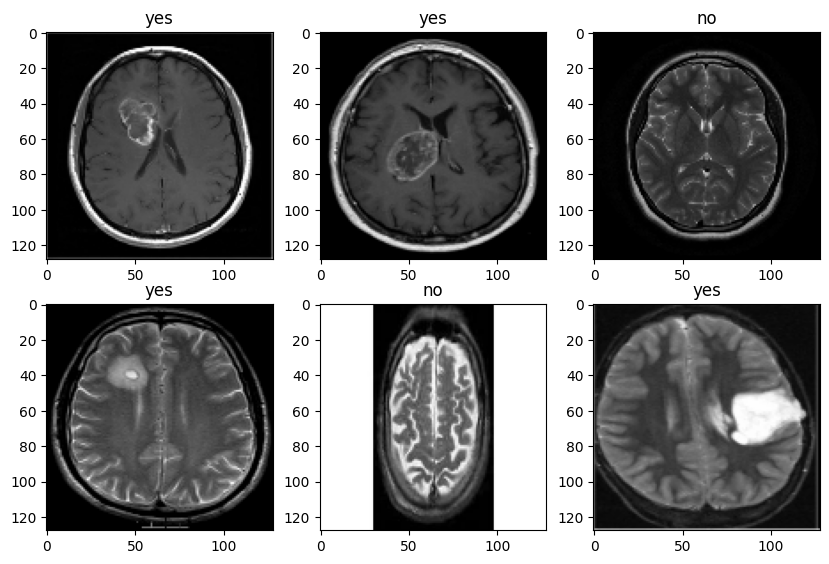

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
      for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [11]:
for image_batch, labels_batch in train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


- 32 is the shape of a tensor
- 32 images of 128 x 128 x 3

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
validate = validate.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.Rescaling(1./255)
# 1. keeps it at same scale
# can make it grow or shrink by changing factor value
# eg 0.5 or 2.0

In [14]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.006347178 0.9651858


In [15]:
from tensorflow.keras.models import Sequential

In [ ]:
#batch_size = 32
#image_height = 128
#image_width = 128

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [20]:
epochs=10
history = model.fit(
  train,
  validation_data=validate,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 2s 230ms/step - loss: 0.6399 - accuracy: 0.6292 - val_loss: 0.5542 - val_accuracy: 0.7467
Epoch 2/10
6/6 [==============================] - 1s 179ms/step - loss: 0.4879 - accuracy: 0.8146 - val_loss: 0.5477 - val_accuracy: 0.7733
Epoch 3/10
6/6 [==============================] - 1s 182ms/step - loss: 0.4196 - accuracy: 0.8202 - val_loss: 0.5282 - val_accuracy: 0.7867
Epoch 4/10
6/6 [==============================] - 1s 154ms/step - loss: 0.3761 - accuracy: 0.8371 - val_loss: 0.5187 - val_accuracy: 0.7733
Epoch 5/10
6/6 [==============================] - 1s 154ms/step - loss: 0.3158 - accuracy: 0.8708 - val_loss: 0.5462 - val_accuracy: 0.7733
Epoch 6/10
6/6 [==============================] - 1s 157ms/step - loss: 0.2703 - accuracy: 0.8652 - val_loss: 0.4903 - val_accuracy: 0.7733
Epoch 7/10
6/6 [==============================] - 1s 154ms/step - loss: 0.1928 - accuracy: 0.9438 - val_loss: 0.4853 - val_accuracy: 0.7733
Epoch 8/10
6/6 [====

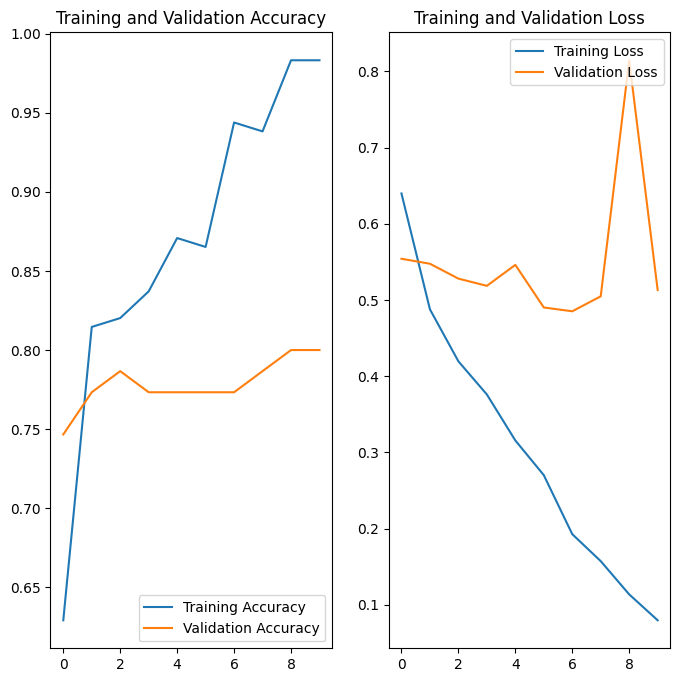

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

#### data augmentation to stop overfitting

In [22]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

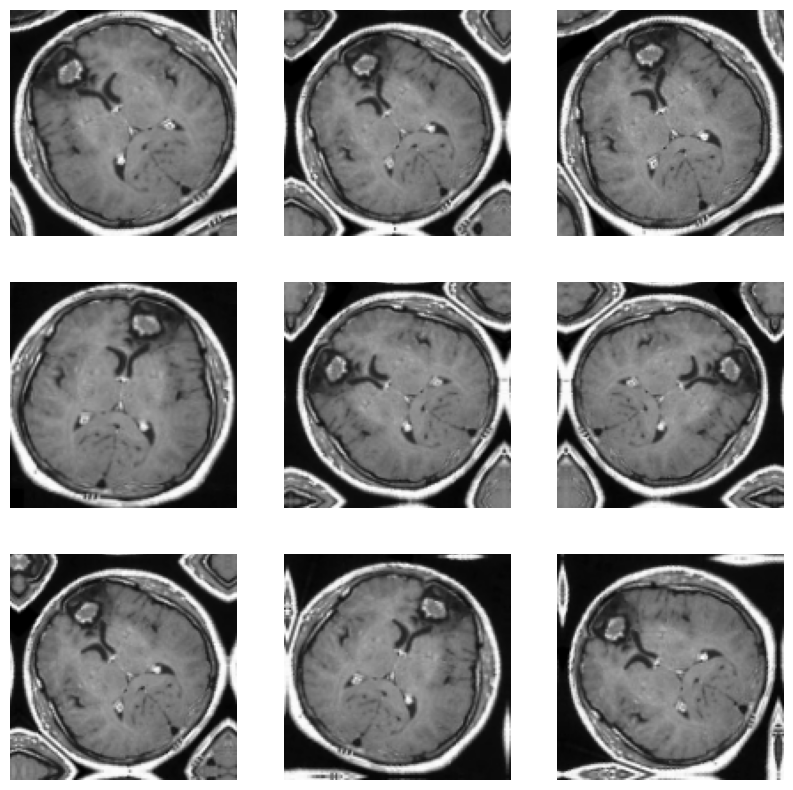

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### dropout to stop overfitting

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
epochs=10
history = model.fit(
  train,
  validation_data=validate,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 6s 227ms/step - loss: 0.6903 - accuracy: 0.6573 - val_loss: 0.5502 - val_accuracy: 0.7200
Epoch 2/10
6/6 [==============================] - 1s 186ms/step - loss: 0.5545 - accuracy: 0.7416 - val_loss: 0.5506 - val_accuracy: 0.7333
Epoch 3/10
6/6 [==============================] - 1s 181ms/step - loss: 0.5383 - accuracy: 0.7247 - val_loss: 0.5514 - val_accuracy: 0.7600
Epoch 4/10
6/6 [==============================] - 1s 187ms/step - loss: 0.5164 - accuracy: 0.7809 - val_loss: 0.5454 - val_accuracy: 0.7600
Epoch 5/10
6/6 [==============================] - 1s 179ms/step - loss: 0.5093 - accuracy: 0.7921 - val_loss: 0.5615 - val_accuracy: 0.7467
Epoch 6/10
6/6 [==============================] - 1s 189ms/step - loss: 0.5374 - accuracy: 0.7247 - val_loss: 0.5457 - val_accuracy: 0.7733
Epoch 7/10
6/6 [==============================] - 1s 178ms/step - loss: 0.4933 - accuracy: 0.7921 - val_loss: 0.5691 - val_accuracy: 0.7467
Epoch 8/10
6/6 [====

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

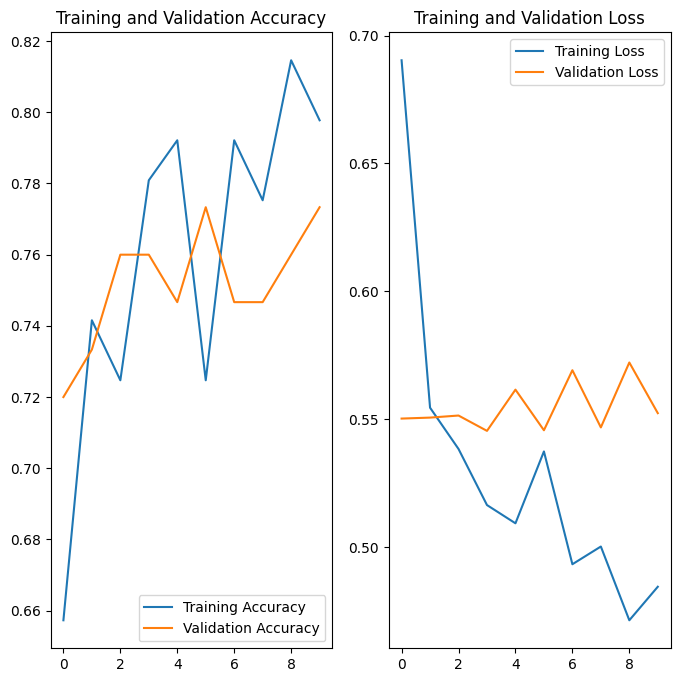

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### test using data from a different dataset
- robustness of this model is important

###### random yes

In [33]:
image_path = "./Testing_YesNo/yes/Te-gl_0011.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 113ms/step
This image most likely belongs to no with a 95.81 percent confidence.


- wrong on first check 

##### glicoma

In [34]:
image_path = "./Testing_withDiagnosis/glioma/Te-gl_0012.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to no with a 90.14 percent confidence.


- wrong for glicoma

###### menigioma

In [36]:
image_path = "./Testing_withDiagnosis/meningioma/Te-me_0013.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to no with a 68.29 percent confidence.


- wrong for meningioma

###### pituitary

In [37]:
image_path = "./Testing_withDiagnosis/pituitary/Te-pi_0014.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to no with a 54.60 percent confidence.


- wrong for pitituary

- need to integrate more training data
- optimize using parameter tuning

##### test to see success rate by tumour type

In [45]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/glioma"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
        
def getercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 25ms/step
success rate: 	 2.0

average confidence rate when wrong: 	 86.64111527455907

average confidence rate when correct: 	 61.26536726951599

average confidence rate for all: 	 86.1336003144582


In [46]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/meningioma"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
        
def getercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 22ms/step
success rate: 	 23.856209150326798

average confidence rate when wrong: 	 83.32157372916717

average confidence rate when correct: 	 75.53898569655745

average confidence rate for all: 	 81.4649432507995


In [44]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/pituitary"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
        
def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getpercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))






1/1 [==============================] - 0s 23ms/step
success rate: 	 28.666666666666668

average confidence rate when wrong: 	 71.15714112731898

average confidence rate when correct: 	 60.78755148621492

average confidence rate for all: 	 68.18452543020248


##### results of first cross data test
- all very poor scores
- first extremely poor for meningioma
- very low confidence when correct and high when wrong
- may not be workable to use all datasets if they are too different in mri scan format
- worth checking low resolution as well

#### Low Resolution Dataset test
- is in yes/no format

In [51]:
from collections import defaultdict

In [58]:
%%time


# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./Brain_images_LowResolution'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './Brain_images_LowResolution/'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))




1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step
Accuracy: 75.53%
no: 367 / 1500
rate of failure: 	 24.46666666666667
yes: 367 / 1500
rate of failure: 	 24.46666666666667
CPU times: total: 2min 25s
Wall time: 4min 40s


In [55]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.53%


- much higher accuracy rate on the low resolution dataset
- possibly to do with the format of the MRI scans
- possible that there is an overlap of data

In [56]:
false_predictions.items()

dict_items([('no', 367), ('yes', 367)])

- a little suspicious 
- running test with sectors of dataset to see if mistake is present

In [59]:
%%time

correct_yes_count = 0
correct_no_count = 0
count_yes = 0
count_no = 0

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./Brain_images_LowResolution'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './Brain_images_LowResolution/'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    break_counter = 0
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        break_counter+=1
        if break_counter > 25:
            break
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))




1/1 [==============================] - 0s 47ms/step
Accuracy: 82.00%
no: 3 / 1500
rate of failure: 	 0.2
yes: 6 / 1500
rate of failure: 	 0.4
CPU times: total: 2.64 s
Wall time: 4.99 s


In [62]:
class_folder = os.path.join(test_data_folder, "yes")
print(class_folder)

files = os.listdir(class_folder)
total_class_count = len(files)
print(total_class_count)

class_folder = os.path.join(test_data_folder, "no")
print(class_folder)

files = os.listdir(class_folder)
total_class_count = len(files)
print(total_class_count)

./Brain_images_LowResolution/yes
1500
./Brain_images_LowResolution/no
1500


- appears to not be an error

### Model Built with Combination of Data

- need to split low resoltution into test and train data first
- only need to run it once

In [63]:
import random
import shutil

In [67]:
%%time 
# Define the source folder containing images
source_folder = './Brain_images_LowResolution/'  # Replace with the actual source folder path

# Define the destination folders for train and test sets
train_destination_folder = './LowRes_Train/'  # Replace with the train set destination folder path
test_destination_folder = './LowRes_Test/'    # Replace with the test set destination folder path

# Define the split ratio
split_ratio = 0.7

# Get list of class folders
class_folders = [class_name for class_name in os.listdir(source_folder)]
for class_folder in class_folders:
    full_name_folder = source_folder + class_folder
    fullname_destination_TRAIN = train_destination_folder + class_folder
    fullname_destination_TEST = test_destination_folder + class_folder
    
    # Get a list of image filenames in the source folder
    image_filenames = [filename for filename in os.listdir(full_name_folder) if filename.endswith('.jpg')]

    # Shuffle the image filenames randomly
    random.shuffle(image_filenames)

    # Calculate the number of images for the train and test sets
    num_total_images = len(image_filenames)
    num_train_images = int(num_total_images * split_ratio)
    num_test_images = num_total_images - num_train_images

    # Create train and test sets
    train_set = image_filenames[:num_train_images]
    test_set = image_filenames[num_train_images:]
    

    # Move images to train destination folder
    for filename in train_set:
        src_path = os.path.join(full_name_folder, filename) 
        dest_path = os.path.join(fullname_destination_TRAIN, filename)
        shutil.move(src_path, dest_path)
    
    # Move images to test destination folder
    for filename in test_set:
        src_path = os.path.join(full_name_folder, filename)
        dest_path = os.path.join(fullname_destination_TEST, filename)
        shutil.copy(src_path, dest_path)
        
    print("class_folder:", class_folder)
    print(f"{num_train_images} images moved to the train set folder.")
    print(f"{num_test_images} images moved to the test set folder.")


class_folder: no
1050 images moved to the train set folder.
450 images moved to the test set folder.
class_folder: yes
1050 images moved to the train set folder.
450 images moved to the test set folder.
CPU times: total: 797 ms
Wall time: 2.41 s


- training set for mix of datasets is completed and ready for training

In [68]:
batch_size = 32
image_height = 128
image_width = 128

In [70]:
train2 = tf.keras.utils.image_dataset_from_directory(
    './Training_Altogether_withLowResolution',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 7953 files belonging to 2 classes.
Using 5568 files for training.


In [72]:
validate2 = tf.keras.utils.image_dataset_from_directory(
    './Training_Altogether_withLowResolution',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)

Found 7953 files belonging to 2 classes.
Using 2385 files for validation.


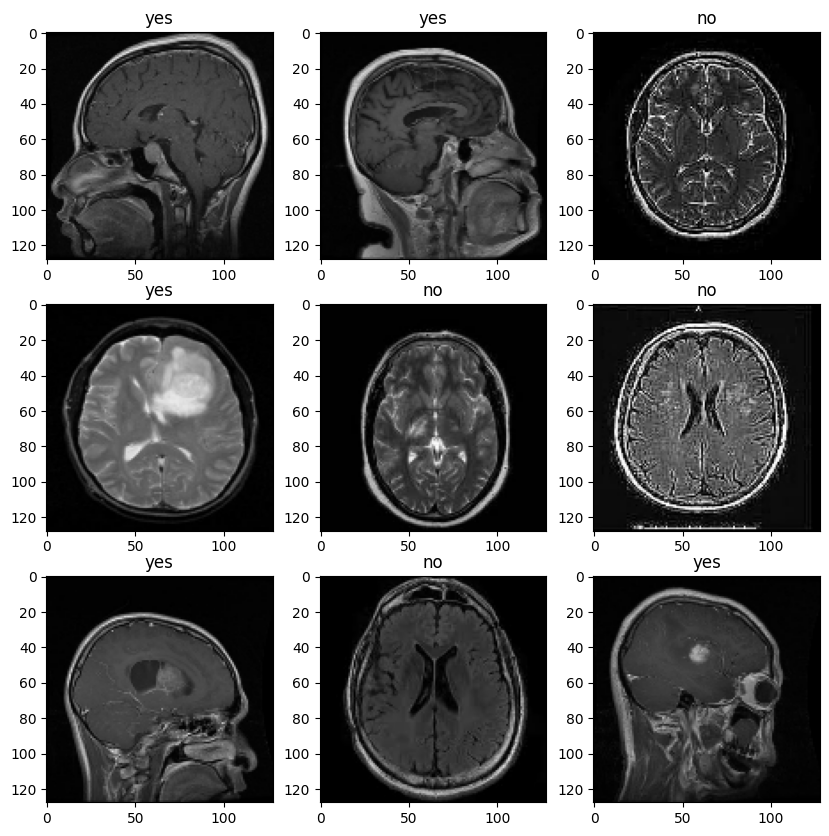

In [73]:
plt.figure(figsize=(10, 10))
for images, labels in train2.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [74]:
AUTOTUNE = tf.data.AUTOTUNE

train2 = train2.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
validate2 = validate2.cache().prefetch(buffer_size=AUTOTUNE)

In [77]:
normalization_layer = layers.Rescaling(1./255)

In [78]:
normalized_ds = train2.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [4]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [79]:
num_classes = len(class_names)

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

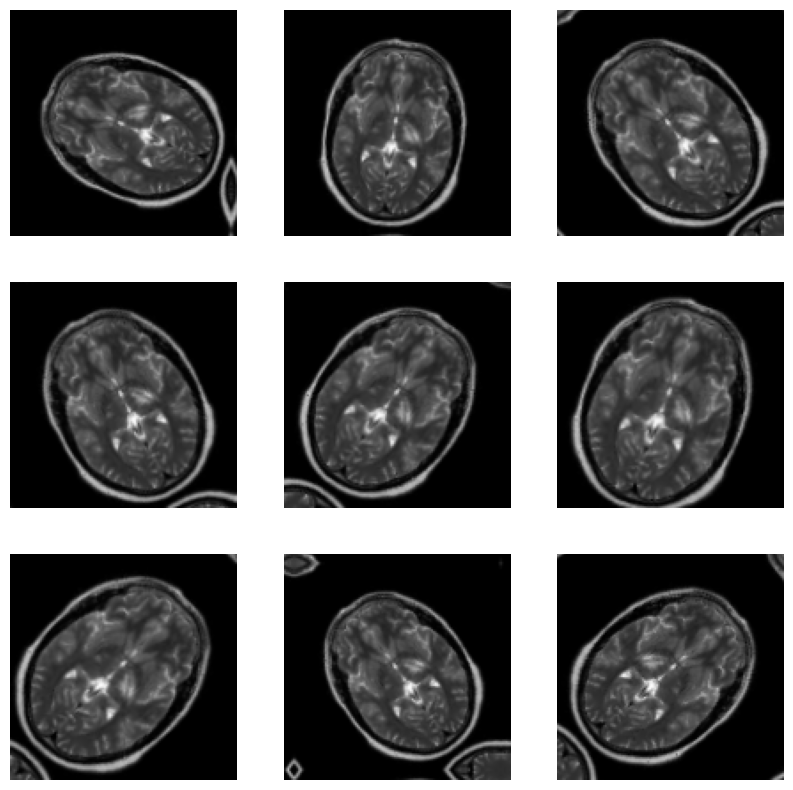

In [81]:
plt.figure(figsize=(10, 10))
for images, _ in train2.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [82]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [83]:
%%time
epochs=10
history = model2.fit(
  train2,
  validation_data=validate2,
  epochs=epochs
)

Epoch 1/10
174/174 [==============================] - 580s 3s/step - loss: 0.4467 - accuracy: 0.7839 - val_loss: 0.3904 - val_accuracy: 0.8356
Epoch 2/10
174/174 [==============================] - 536s 3s/step - loss: 0.3257 - accuracy: 0.8556 - val_loss: 0.8364 - val_accuracy: 0.6516
Epoch 3/10
174/174 [==============================] - 716s 4s/step - loss: 0.2797 - accuracy: 0.8761 - val_loss: 0.6988 - val_accuracy: 0.6696
Epoch 4/10
174/174 [==============================] - 666s 4s/step - loss: 0.2520 - accuracy: 0.8901 - val_loss: 0.3903 - val_accuracy: 0.8625
Epoch 5/10
174/174 [==============================] - 541s 3s/step - loss: 0.2367 - accuracy: 0.9010 - val_loss: 0.5054 - val_accuracy: 0.7992
Epoch 6/10
174/174 [==============================] - 533s 3s/step - loss: 0.2217 - accuracy: 0.9073 - val_loss: 0.4311 - val_accuracy: 0.8453
Epoch 7/10
174/174 [==============================] - 534s 3s/step - loss: 0.1999 - accuracy: 0.9170 - val_loss: 0.3645 - val_accuracy: 0.8574

- if run again, please increase batch size as too slow
- likely peaked at 9 epochs

In [84]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

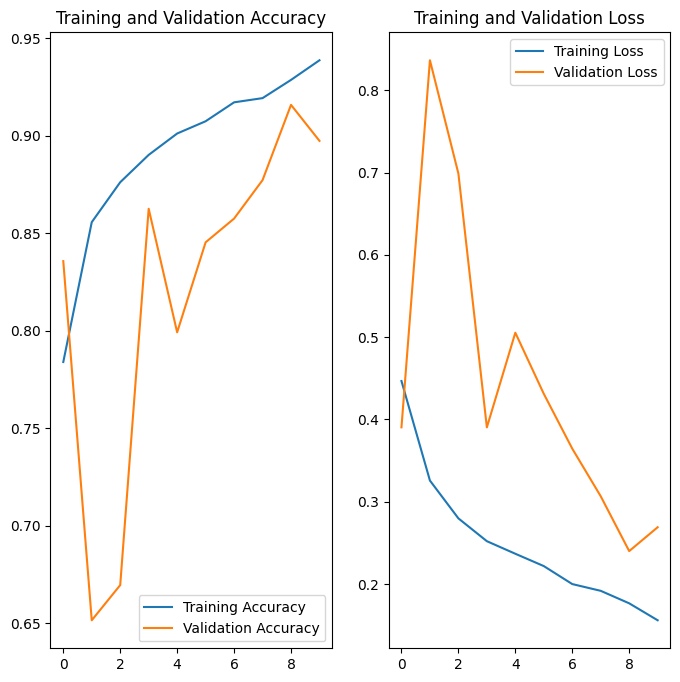

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
model2.save('./model2/')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [88]:
modelload = keras.models.load_model('./model2')

In [89]:
modelload

In [90]:
image_path = "./Testing_withDiagnosis/glioma/Te-gl_0012.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 197ms/step
This image most likely belongs to yes with a 99.93 percent confidence.


In [91]:
image_path = "./Testing_YesNo/yes/Te-me_0013.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 91ms/step
This image most likely belongs to yes with a 67.56 percent confidence.


In [92]:
image_path = "./Testing_YesNo/yes/Te-pi_0013.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 83ms/step
This image most likely belongs to yes with a 100.00 percent confidence.


In [94]:
image_path = "./Testing_YesNo/no/Te-no_0013.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 91ms/step
This image most likely belongs to yes with a 59.87 percent confidence.


- wrong but low confidence

In [95]:
image_path = "./LowRes_Test/no/no1001.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 90ms/step
This image most likely belongs to yes with a 98.07 percent confidence.


- incorrect and high confidence

In [96]:
image_path = "./LowRes_Test/yes/y100.jpg"

img = tf.keras.utils.load_img(
    image_path, target_size=(image_height, image_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelload.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 106ms/step
This image most likely belongs to yes with a 85.74 percent confidence.


- correct
- may already have a good false-positive bias due to the higher number of positive training data
- beneficial to have false-positive bias in such a situation as diagnosing brain tumours because of consequences of false negative

In [97]:
%%time

correct_yes_count = 0
correct_no_count = 0
count_yes = 0
count_no = 0

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./Testing_YesNo'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './Testing_YesNo/'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))




1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 74ms/step
Accuracy: 51.52%
no: 224 / 855
rate of failure: 	 26.198830409356727
yes: 848 / 1356
rate of failure: 	 62.53687315634219
CPU times: total: 1min 55s
Wall time: 5min 31s


- terrible on the test set
- need to rethink overfitting
- bootstrap or crossfit?
- worse than guessing everything was "yes"


### Building multi model tree system

###### 2 compatible datasets model

In [5]:
batch_size = 64
image_height = 128
image_width = 128

In [7]:
train3 = tf.keras.utils.image_dataset_from_directory(
    './LowRes+Original_Train',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 2265 files belonging to 2 classes.
Using 1586 files for training.


In [8]:
valid3 = tf.keras.utils.image_dataset_from_directory(
    './LowRes+Original_Train',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 2265 files belonging to 2 classes.
Using 679 files for validation.


In [12]:
class_names = train3.class_names
class_names

['no', 'yes']

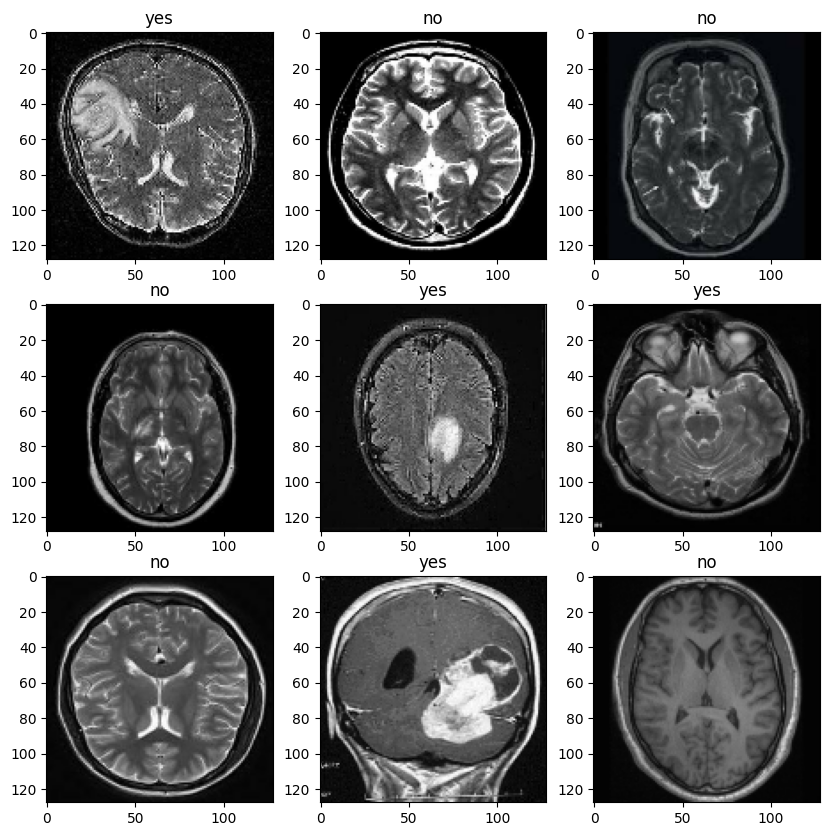

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train3.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train3 = train3.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
valid3 = valid3.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = layers.Rescaling(1./255)

In [17]:
normalized_ds = train3.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0062023094 0.9991537


In [18]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [21]:
num_classes = len(class_names)

model3 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

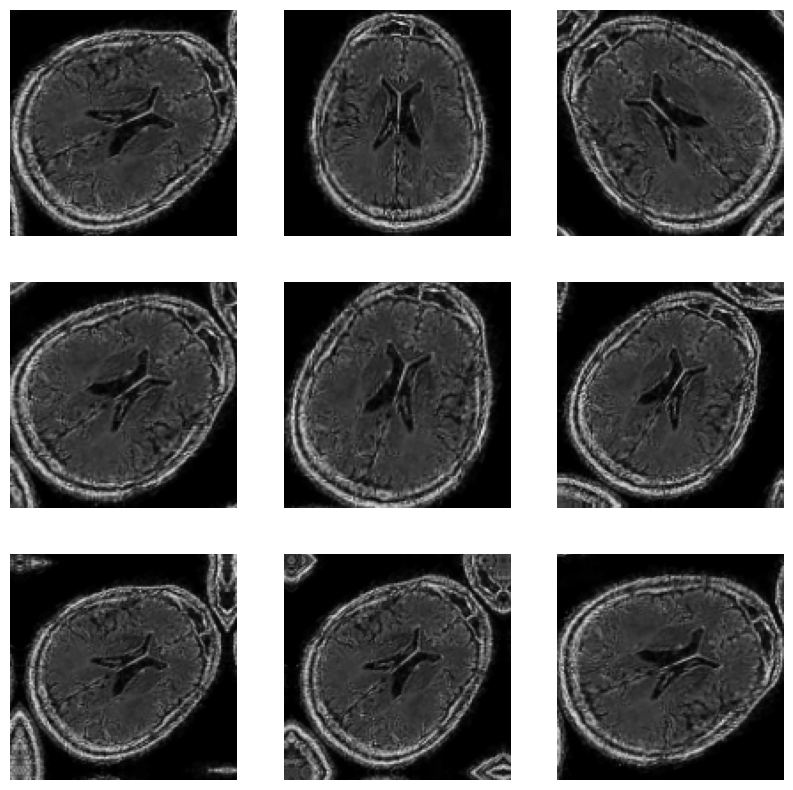

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train3.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
%%time
epochs=7
history = model3.fit(
  train3,
  validation_data=valid3,
  epochs=epochs
)

Epoch 1/7
25/25 [==============================] - 19s 472ms/step - loss: 0.5890 - accuracy: 0.7024 - val_loss: 0.5231 - val_accuracy: 0.7511
Epoch 2/7
25/25 [==============================] - 11s 444ms/step - loss: 0.5137 - accuracy: 0.7497 - val_loss: 0.5026 - val_accuracy: 0.7732
Epoch 3/7
25/25 [==============================] - 10s 417ms/step - loss: 0.4754 - accuracy: 0.7781 - val_loss: 0.5199 - val_accuracy: 0.7820
Epoch 4/7
25/25 [==============================] - 10s 402ms/step - loss: 0.4549 - accuracy: 0.7945 - val_loss: 0.5517 - val_accuracy: 0.7717
Epoch 5/7
25/25 [==============================] - 10s 407ms/step - loss: 0.4328 - accuracy: 0.7938 - val_loss: 0.4697 - val_accuracy: 0.8144
Epoch 6/7
25/25 [==============================] - 10s 392ms/step - loss: 0.4228 - accuracy: 0.7989 - val_loss: 0.5208 - val_accuracy: 0.7938
Epoch 7/7
25/25 [==============================] - 10s 383ms/step - loss: 0.4212 - accuracy: 0.8096 - val_loss: 0.4268 - val_accuracy: 0.8247
CPU ti

In [26]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

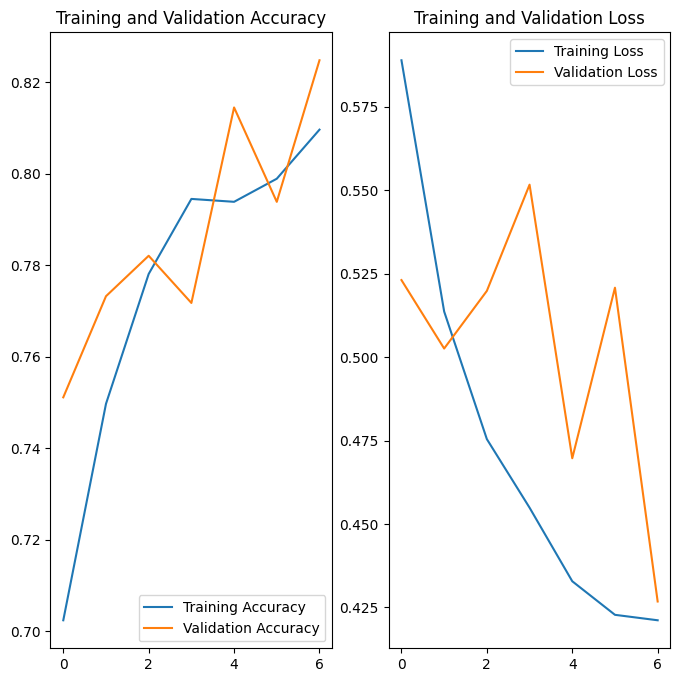

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- probably could run more epochs 

In [30]:
from collections import defaultdict

In [32]:
%%time

correct_yes_count = 0
correct_no_count = 0
count_yes = 0
count_no = 0

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./LowRes+Original_Test'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './LowRes+Original_Test'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model3.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))




1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step
Accuracy: 82.98%
no: 121 / 490
rate of failure: 	 24.693877551020407
yes: 46 / 491
rate of failure: 	 9.368635437881874
CPU times: total: 25.2 s
Wall time: 1min 8s


- good accuracy score
- too many false negatives 

###### outlier dataset model

In [33]:
train4 = tf.keras.utils.image_dataset_from_directory(
    './wdDataSet_ynFormat_Train',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 5712 files belonging to 2 classes.
Using 3999 files for training.


In [34]:
valid4 = tf.keras.utils.image_dataset_from_directory(
    './wdDataSet_ynFormat_Train',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 5712 files belonging to 2 classes.
Using 1713 files for validation.


In [93]:
class_names = train4.class_names
class_names

AttributeError: 'PrefetchDataset' object has no attribute 'class_names'

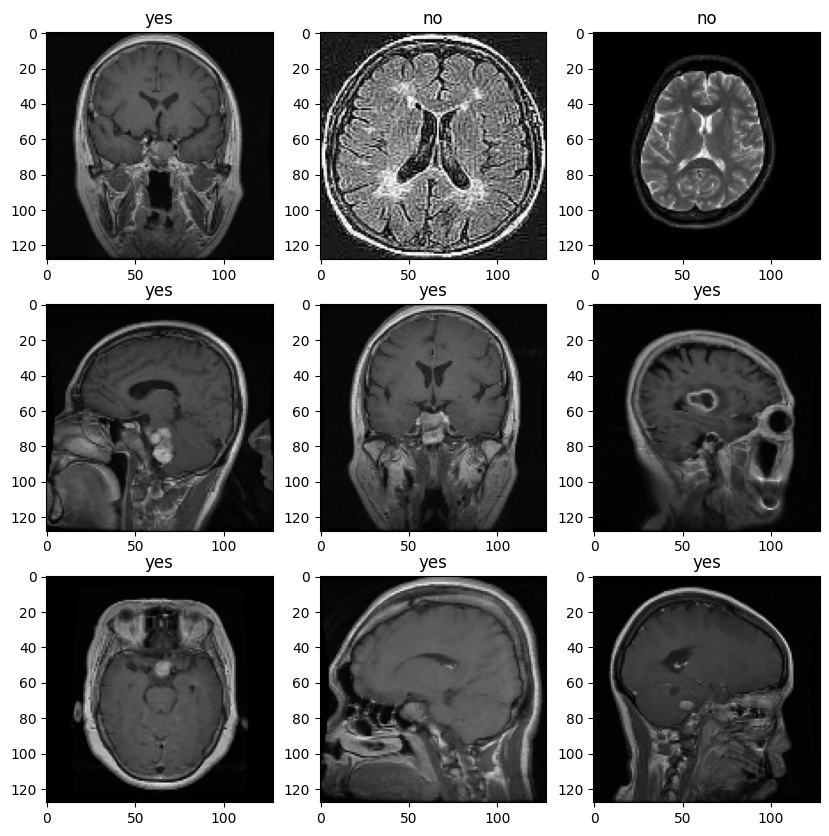

In [36]:
plt.figure(figsize=(10, 10))
for images, labels in train4.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train4 = train4.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
valid4 = valid4.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
normalization_layer = layers.Rescaling(1./255)

In [39]:
normalized_ds = train4.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9156863


In [40]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [41]:
num_classes = len(class_names)

model4 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

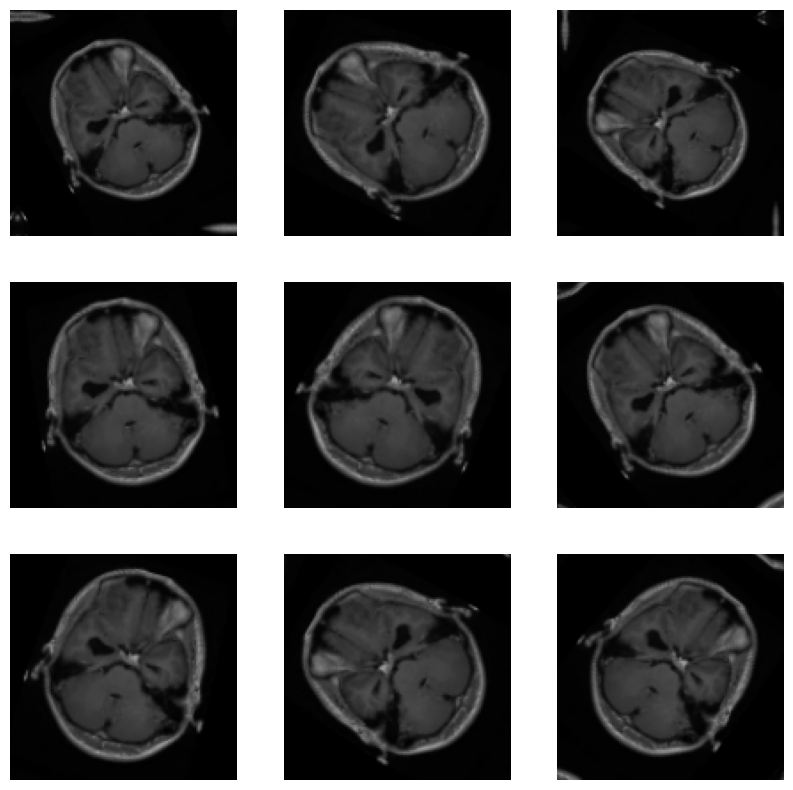

In [42]:
plt.figure(figsize=(10, 10))
for images, _ in train4.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [43]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
%%time
epochs=7
history = model4.fit(
  train4,
  validation_data=valid4,
  epochs=epochs
)

Epoch 1/7
63/63 [==============================] - 31s 418ms/step - loss: 0.4625 - accuracy: 0.7927 - val_loss: 0.2682 - val_accuracy: 0.8943
Epoch 2/7
63/63 [==============================] - 24s 373ms/step - loss: 0.2333 - accuracy: 0.9112 - val_loss: 1.0563 - val_accuracy: 0.5487
Epoch 3/7
63/63 [==============================] - 24s 383ms/step - loss: 0.1837 - accuracy: 0.9347 - val_loss: 1.1976 - val_accuracy: 0.5593
Epoch 4/7
63/63 [==============================] - 23s 370ms/step - loss: 0.1435 - accuracy: 0.9495 - val_loss: 0.6915 - val_accuracy: 0.7320
Epoch 5/7
63/63 [==============================] - 23s 363ms/step - loss: 0.1427 - accuracy: 0.9495 - val_loss: 0.6374 - val_accuracy: 0.7210
Epoch 6/7
63/63 [==============================] - 23s 365ms/step - loss: 0.1195 - accuracy: 0.9602 - val_loss: 0.7054 - val_accuracy: 0.6964
Epoch 7/7
63/63 [==============================] - 23s 365ms/step - loss: 0.1121 - accuracy: 0.9642 - val_loss: 0.3596 - val_accuracy: 0.8406
CPU ti

- suspicious it is configured poorly 
- need to double check data too

In [45]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

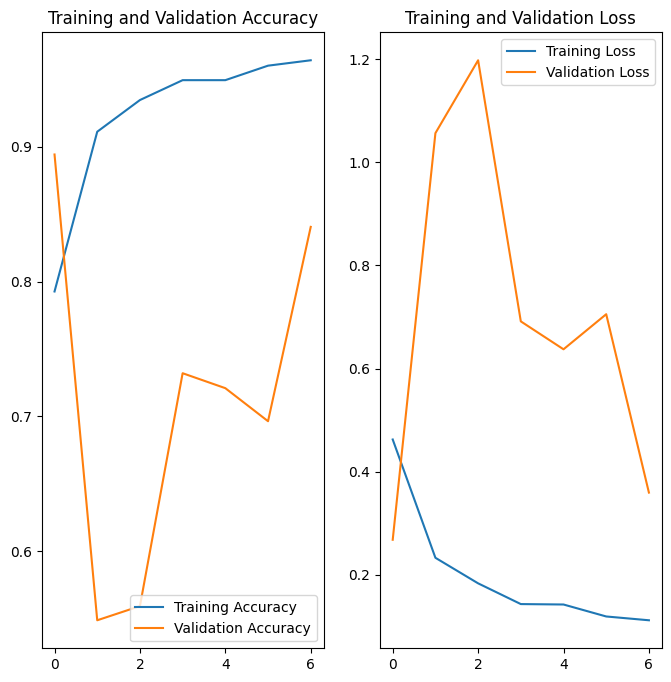

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
%%time

correct_yes_count = 0
correct_no_count = 0
count_yes = 0
count_no = 0

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./wdDataSet_ynFormat_Test'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './wdDataSet_ynFormat_Test'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model4.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))




1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step
Accuracy: 74.60%
no: 2 / 405
rate of failure: 	 0.49382716049382713
yes: 331 / 906
rate of failure: 	 36.53421633554083
CPU times: total: 19.8 s
Wall time: 1min 27s


- decent performance
- false positive preference
    - likely from the higher amount of positive diagnosis data available
###### further tests by each tumour type 

###### glioma

In [49]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

false_negatives = defaultdict(int)
false_neg_count = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/glioma"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model4.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
    
    
        
def getercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 23ms/step
success rate: 	 79.66666666666666

average confidence rate when wrong: 	 77.2948576778662

average confidence rate when correct: 	 92.3809038794689

average confidence rate for all: 	 89.31340781847636


###### meningioma

In [50]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/meningioma"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model4.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
        
def getercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 24ms/step
success rate: 	 57.84313725490197

average confidence rate when wrong: 	 88.3021032163339

average confidence rate when correct: 	 94.75256096845293

average confidence rate for all: 	 92.03325034746157


###### pituitary

In [97]:
confidence_array = []
confidence_correct = []
confidence_wrong = []


correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/pituitary"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model4.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class == "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
     
    
        
def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getpercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 33ms/step
success rate: 	 53.0

average confidence rate when wrong: 	 81.02152968974823

average confidence rate when correct: 	 82.66069791601889

average confidence rate for all: 	 81.89028884967168


In [90]:
predicted_class

'glioma'

###### no tumour

In [52]:
confidence_array = []
confidence_correct = []
confidence_wrong = []

correct_counter = 0
total_counter = 0

# Specify the path to the folder containing the images
folder_path = "./Testing_withDiagnosis/no"  # Replace with the actual path to your image folder

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# Iterate through the images and make predictions
for image_path in image_files:
    img = tf.keras.utils.load_img(
        image_path, target_size=(image_height, image_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model4.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    
    if predicted_class != "yes":
        correct_counter+=1
        confidence_correct.append(confidence)
    else:
        confidence_wrong.append(confidence)
        
    confidence_array.append(confidence)
    total_counter+=1
    
        
def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

def get_mean(numbers):
    return sum(numbers) / len(numbers)

 
print("success rate: \t", getpercent(correct_counter, total_counter))
print()
print("average confidence rate when wrong: \t", get_mean(confidence_wrong))
print()
print("average confidence rate when correct: \t", get_mean(confidence_correct))
print()
print("average confidence rate for all: \t", get_mean(confidence_array))


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step
success rate: 	 99.50617283950616

average confidence rate when wrong: 	 91.8313592672348

average confidence rate when correct: 	 98.13859437594638

average confidence rate for all: 	 98.10744753590336


- interestingly bad scores
- "No Tumour" and "glioma" good 
- curious whether it would benefit the results to seperate "meningmona" and "pituitary" or even put in the other model
- surprising that the model cannot identify "meningmona" at a higher rate based on inspection of the images
- "pituitary" is not easy to seperate from "no tumour" for the untrained human eye

### model with diagnosis included

In [100]:
batch_size = 64
image_height = 128
image_width = 128

In [101]:
train5 = tf.keras.utils.image_dataset_from_directory(
    './Training_withDiagnosis',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 5712 files belonging to 4 classes.
Using 3999 files for training.


In [102]:
valid5 = tf.keras.utils.image_dataset_from_directory(
    './Training_withDiagnosis',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 5712 files belonging to 4 classes.
Using 1713 files for validation.


In [103]:
class_names = train5.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

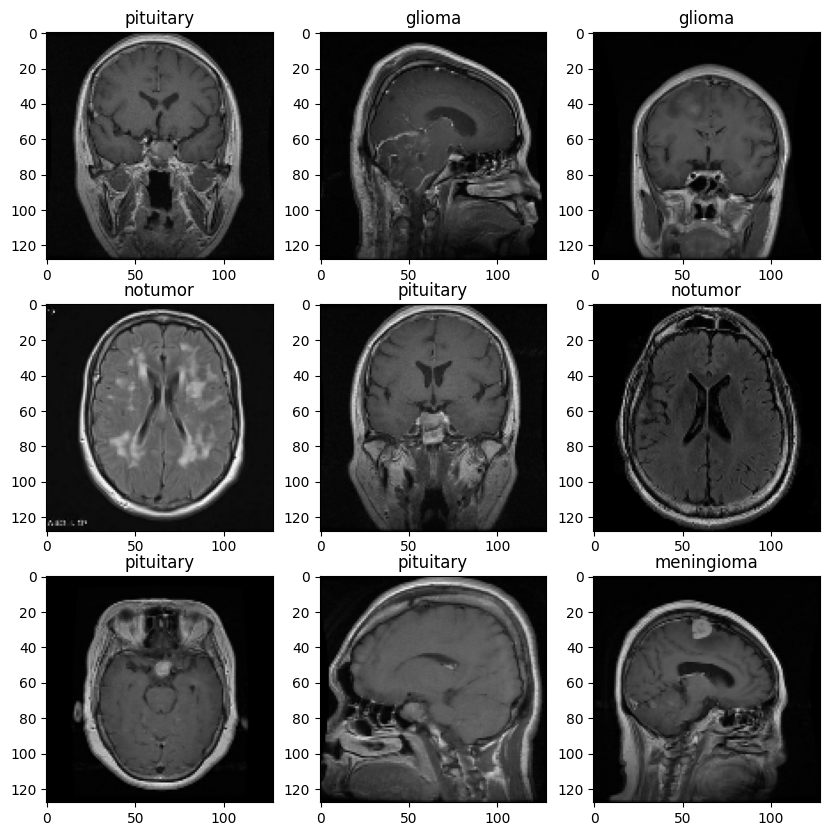

In [104]:
plt.figure(figsize=(10, 10))
for images, labels in train5.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [105]:
AUTOTUNE = tf.data.AUTOTUNE

train5 = train5.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
valid5 = valid5.cache().prefetch(buffer_size=AUTOTUNE)

In [106]:
normalization_layer = layers.Rescaling(1./255)

In [107]:
normalized_ds = train5.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9715687


In [108]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [109]:
num_classes = len(class_names)

model5 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

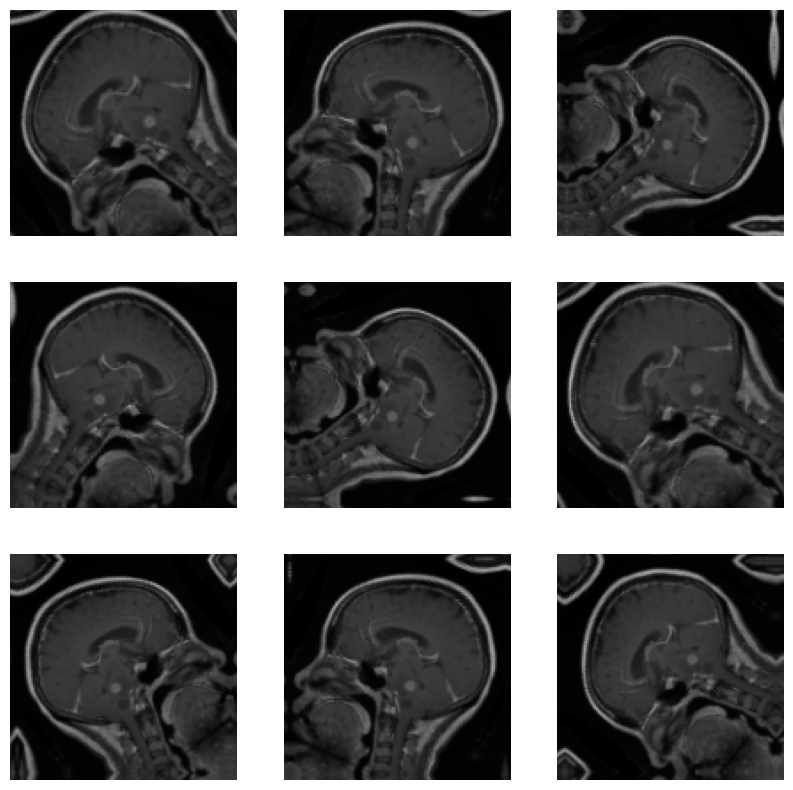

In [110]:
plt.figure(figsize=(10, 10))
for images, _ in train5.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [111]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [112]:
%%time
epochs=7
history = model5.fit(
  train5,
  validation_data=valid5,
  epochs=epochs
)

Epoch 1/7
63/63 [==============================] - 182s 3s/step - loss: 0.9542 - accuracy: 0.5959 - val_loss: 0.8231 - val_accuracy: 0.6392
Epoch 2/7
63/63 [==============================] - 130s 2s/step - loss: 0.6785 - accuracy: 0.7334 - val_loss: 0.6280 - val_accuracy: 0.7572
Epoch 3/7
63/63 [==============================] - 134s 2s/step - loss: 0.5844 - accuracy: 0.7687 - val_loss: 0.7503 - val_accuracy: 0.7157
Epoch 4/7
63/63 [==============================] - 133s 2s/step - loss: 0.5101 - accuracy: 0.7984 - val_loss: 1.4167 - val_accuracy: 0.5517
Epoch 5/7
63/63 [==============================] - 150s 2s/step - loss: 0.5132 - accuracy: 0.7924 - val_loss: 0.8429 - val_accuracy: 0.6859
Epoch 6/7
63/63 [==============================] - 133s 2s/step - loss: 0.4374 - accuracy: 0.8305 - val_loss: 0.6322 - val_accuracy: 0.7717
Epoch 7/7
63/63 [==============================] - 135s 2s/step - loss: 0.4449 - accuracy: 0.8332 - val_loss: 0.7079 - val_accuracy: 0.7513
CPU times: total: 4m

In [113]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                 

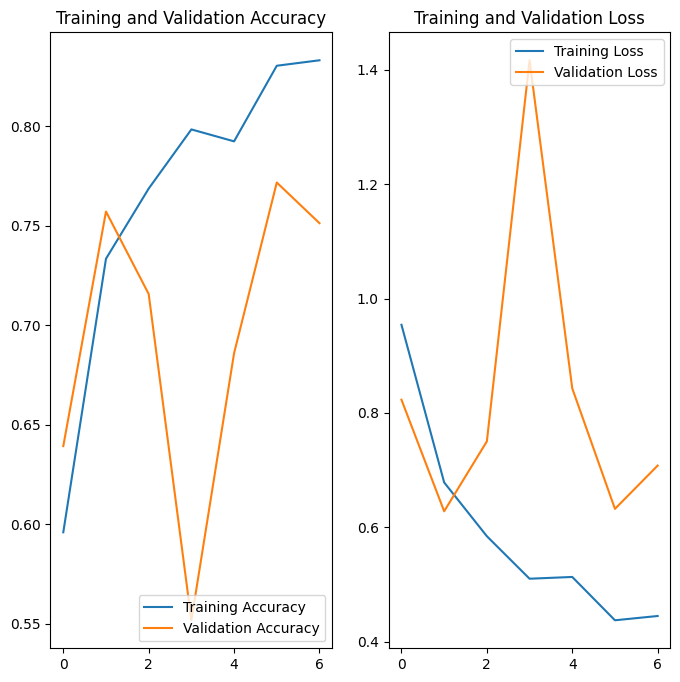

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [136]:
%%time

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

#track false negatives
false_negatives = defaultdict(int)
false_neg_count = 0

# Define the class names based on the folder names
class_names = sorted(os.listdir('./Testing_withDiagnosis'))  # Replace with the path to your dataset folder

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './Testing_withDiagnosis'  # Replace with the path to your test dataset folder

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model5.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1
            
        #track false negatives
        if predicted_class != class_name and predicted_class == "no":
            false_negatives[class_name] += 1
            false_neg_count +=1
        
            

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count), "%")

    

notumor_path = './Testing_withDiagnosis/no' 
notumor_items = os.listdir(notumor_path)
notumor_files = [item for item in notumor_items if os.path.isfile(os.path.join(notumor_path, item))]
notumor =  len(notumor_files)
    
print("false negative by tumour class: ", false_negatives.items())
print(f"missed tumour idenitfication rate:  {false_neg_count}/ {notumor}")
print(f"yes/no format accuracy rate: \t {((len(predicted_labels) - false_neg_count) / len(predicted_labels)) *100}%")
print(f"yes/no format full numbers: \t {len(predicted_labels) - false_neg_count}/ {len(predicted_labels)}")



1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 74ms/step
Accuracy: 65.75%
glioma: 151 / 300
rate of failure: 	 50.33333333333333 %
meningioma: 210 / 306
rate of failure: 	 68.62745098039215 %
no: 4 / 405
rate of failure: 	 0.9876543209876543 %
pituitary: 84 / 300
rate of failure: 	 28.000000000000004 %
false negative by tumour class:  dict_items([('glioma', 94), ('meningioma', 160), ('pituitary', 84)])
missed tumour idenitfication rate:  338/ 405
yes/no format accuracy rate: 	 74.21815408085432%
yes/no format full numbers: 	 973/ 1311
CPU times: total: 1min 10s
Wall time: 2min 36s


In [137]:
false_predictions.items()

dict_items([('glioma', 151), ('meningioma', 210), ('no', 4), ('pituitary', 84)])

In [138]:
false_negatives.items()

dict_items([('glioma', 94), ('meningioma', 160), ('pituitary', 84)])

- although the score given is on ~66% the accuracy at predicting a positive diagnosis is ~74% when the data is split this way and there is already a high false negative rate which is very dangerous and problematic
- surprisingly bad at predicitng glioma in this model 
- predicts "no" quite well so there is room to amend the bias of the model and reduce false negatives
- meningioma most likely to be mistaken for false
- most false predictions are false negatives
- all false predictions of "pituitary" are false negatives

### separation layer model

In [139]:
batch_size = 64
image_height = 128
image_width = 128

In [140]:
train6 = tf.keras.utils.image_dataset_from_directory(
    './Seperation_train',
    labels='inferred',
    validation_split=0.3,
    subset='training',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 7977 files belonging to 2 classes.
Using 5584 files for training.


In [141]:
valid6 = tf.keras.utils.image_dataset_from_directory(
    './Seperation_train',
    labels='inferred',
    validation_split=0.3,
    subset='validation',
    seed=42, # not important but needed for reproducing the code
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 7977 files belonging to 2 classes.
Using 2393 files for validation.


In [142]:
class_names = train6.class_names
class_names

['model_A_lrod', 'model_B_wd']

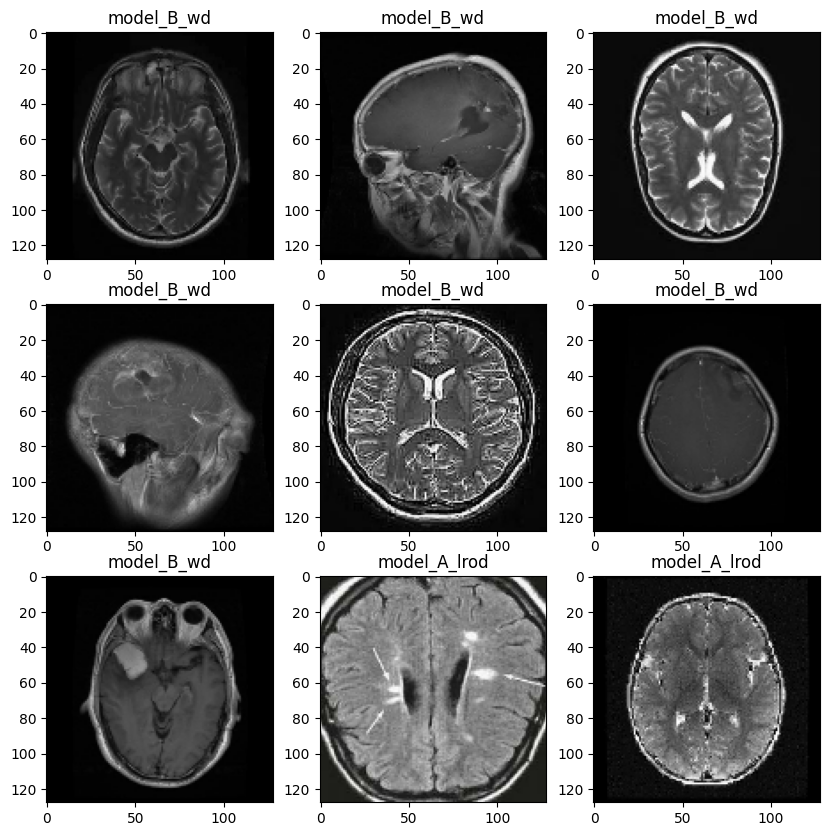

In [143]:
plt.figure(figsize=(10, 10))
for images, labels in train6.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [144]:
AUTOTUNE = tf.data.AUTOTUNE

train6 = train6.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
valid6 = valid6.cache().prefetch(buffer_size=AUTOTUNE)

In [145]:
normalization_layer = layers.Rescaling(1./255)

In [146]:
normalized_ds = train6.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.959804


In [147]:
data_augmentation = tf.keras.Sequential([
    # flips it upside down
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # moves randomly at angle of 0.2 radians
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    # random zoom kept small because dont want to exclude tumour
    # may remove later
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [148]:
num_classes = len(class_names)

model6 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

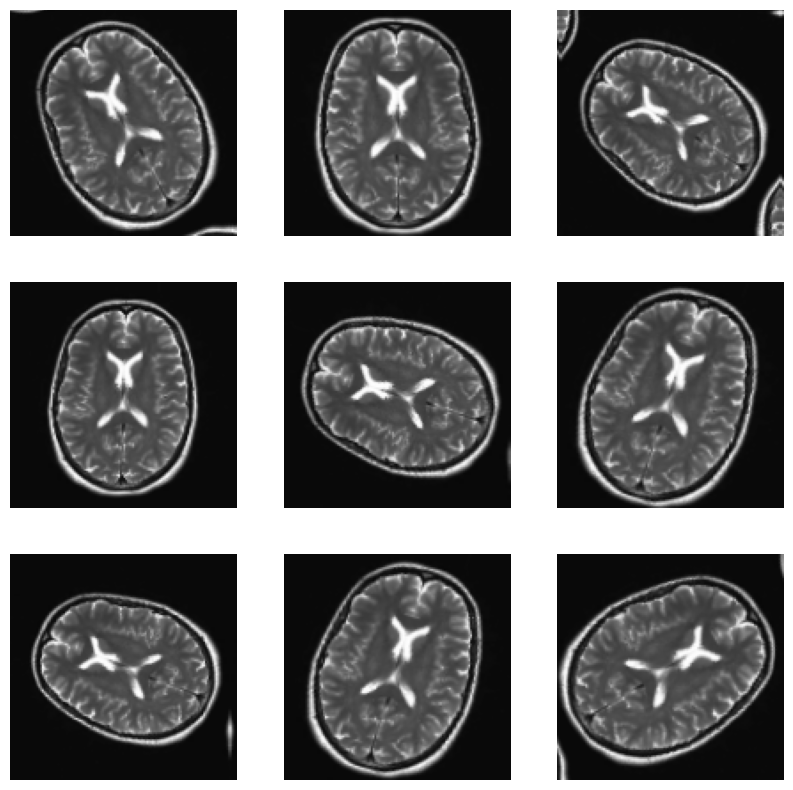

In [149]:
plt.figure(figsize=(10, 10))
for images, _ in train6.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [150]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [152]:
%%time
epochs=6
history = model6.fit(
  train6,
  validation_data=valid6,
  epochs=epochs
)

Epoch 1/6
88/88 [==============================] - 807s 9s/step - loss: 0.5124 - accuracy: 0.7131 - val_loss: 0.4403 - val_accuracy: 0.7952
Epoch 2/6
88/88 [==============================] - 884s 10s/step - loss: 0.4047 - accuracy: 0.8001 - val_loss: 0.3765 - val_accuracy: 0.7998
Epoch 3/6
88/88 [==============================] - 778s 9s/step - loss: 0.3857 - accuracy: 0.7996 - val_loss: 0.4543 - val_accuracy: 0.7752
Epoch 4/6
88/88 [==============================] - 884s 10s/step - loss: 0.3688 - accuracy: 0.8046 - val_loss: 0.3639 - val_accuracy: 0.8078
Epoch 5/6
88/88 [==============================] - 786s 9s/step - loss: 0.3518 - accuracy: 0.8150 - val_loss: 0.3676 - val_accuracy: 0.8103
Epoch 6/6
88/88 [==============================] - 802s 9s/step - loss: 0.3473 - accuracy: 0.8112 - val_loss: 0.3717 - val_accuracy: 0.8078
CPU times: total: 21min 40s
Wall time: 1h 22min 21s


In [153]:
model6.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                

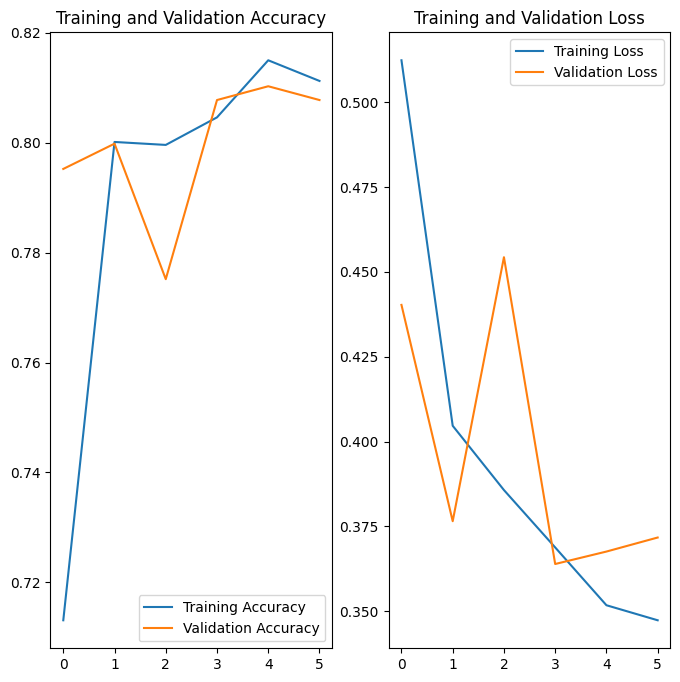

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- possibly overfit

In [157]:
%%time

# Create a dictionary to store false prediction counts for each class
false_predictions = defaultdict(int)

# Define the class names based on the folder names
class_names = sorted(os.listdir('./Seperation_test')) 

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the test dataset folder
test_data_folder = './Seperation_test'  

# Iterate through the test dataset
for class_name in class_names:
    class_folder = os.path.join(test_data_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        # Load and preprocess the image
        img = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = model6.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]

        # Append true and predicted labels to the lists
        true_labels.append(class_name)
        predicted_labels.append(predicted_class)
        
        # Check if the prediction is correct
        if predicted_class != class_name:
            false_predictions[class_name] += 1

# Calculate accuracy
correct_predictions = [true == pred for true, pred in zip(true_labels, predicted_labels)]
accuracy = sum(correct_predictions) / len(correct_predictions)


# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

def getpercent(numerator, denominator):
    return (numerator / denominator) * 100

for class_name, wrong_count in false_predictions.items():
    class_folder = os.path.join(test_data_folder, class_name)
    files = os.listdir(class_folder)
    total_class_count = len(files)
    print(f"{class_name}: {wrong_count} / {total_class_count}")
    print("rate of failure: \t", getpercent(wrong_count, total_class_count))


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 71ms/step
Accuracy: 77.84%
model_A_lrod: 113 / 981
rate of failure: 	 11.518858307849133
model_B_wd: 395 / 1311
rate of failure: 	 30.129672006102208
CPU times: total: 1min 45s
Wall time: 5min 14s


In [158]:
len(predicted_labels)

2292

- accuracy is pretty good but needs to be optimised
- curious to know if the incorrect predictions would be workable in the second layer models even if they're using a different set
- 2 layer approach seems workable in this scenario but might not be at >80% level
- lots of work needed to optimise models